<font color=cyan><h1><center>Fitting a Model to Data</center>

- in order to install or uninstall packages use "pip install ..." or "conda install ..." 
- the themes package I am using came from https://github.com/dunovank/jupyter-themes

<font color=pink><h1><center>Understand the Data and Decide Carefully on the Model to Use</center>

$$\gamma(x)=\frac{\alpha_0+\alpha_1x+\alpha_2x^2+\alpha_3x^3}{1+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4x^4}$$

- The above equation is a third- to fourth-order Padé approximant
    - Useful for extrapolating to higher values
    - Data must be dependent on a single variable (x)

$$\gamma(x,k)=\alpha_0+(\alpha_1x+\alpha_2k)+(\alpha_3x^2+
\alpha_4k^2+\alpha_5xk)+(\alpha_6x^3+\alpha_7k^3+\alpha_8m^2k+\alpha_9xk^2)$$

- The above equation is a 2-dimensional polynomial fit
    - Useful when data are dependent on two variables (x, k)

$$\gamma(x,y)= A * e^{-\frac{x-x_0}{x\alpha^2}-\frac{y-y_0}{y\alpha^2}}$$

- The above equation is a gaussain equation
    - Useful in many fields of science and industry, it is commonly used for 3D fits

<font color=orange><h1><center>Padé approximant</center>

In [1]:
# # =============================================================================
# #   PREAMBLE
# # =============================================================================
import os
from numpy import *
import numpy as np
from pylab import *
from scipy import *
import scipy as scipy
import scipy.optimize as optimization
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# # =============================================================================
# #   READ IN DATA
# # =============================================================================

# These are literature values of broadening in second column (Y values).
# These are literature values of the rotational running index (|m) in first column (X values).
# The third column is the error or uncertainties on the values.

datavals = np.loadtxt("Pade Data.dat")

x_dat_values      = datavals[:,0] # x
y_dat_values      = datavals[:,1] # 𝛾
dat_uncertainties = datavals[:,2] # Error (uncertainty)

In [3]:
#print(x_dat_values)
#print(y_dat_values)
#print(dat_uncertainties)

In [4]:
# # =============================================================================
# #   EXAMPLE FUNCTIONAL FORM
# # =============================================================================
# List of the cefficeint names
coeffs = ( 'a0','a1','a2','a3','b1','b2','b3','b4' )
# This is the function that will be used to fit the values
def func_to_fit(x,a0,a1,a2,a3,b1,b2,b3,b4 ):
    pade_approx =  (a0+a1*x+a2*x**2+a3*x**3)/(1+b1*x+b2*x**2+b3*x**3+b4*x**4)
    return pade_approx   

In [5]:
# --------------------------------- Final Fitted Pade choice ------------------------------------
#init_values = array([-38.50910782124427, 1262.8594684907569, 56.414459271517124, \
#-156.91818386855465, 1413.196293887004, -163.83058456504256, -98.56475524719731, -1.0612028693672826])

# --------------------------------- Below are initial fitted Pade values ------------------------------
init_values = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])

In [6]:
# This is where the fuction is fit and the resulting coefficeints (and covariance if needed)

fitcoeffs = scipy.optimize.curve_fit(func_to_fit, x_dat_values, y_dat_values, init_values, 
                                     sigma=dat_uncertainties)

In [7]:
# Print out each coefficient in the order they are given to the function
print('\nThe fitted values are:')
for i in range(0, len(fitcoeffs[0])):
    print('\n > ', "{} = {}".format( coeffs[i], fitcoeffs[0][i]) )


The fitted values are:

 >  a0 = -38.50910782124427

 >  a1 = 1262.8594684907569

 >  a2 = 56.414459271517124

 >  a3 = -156.91818386855465

 >  b1 = 1413.196293887004

 >  b2 = -163.83058456504256

 >  b3 = -98.56475524719731

 >  b4 = -1.0612028693672826


In [8]:
# This is the x values you want to evaluate the fiunction for 
func_x = arange(2.0, 125.0, 0.3)
# First number is the x value you start at
# Second number is the x value you end at
# Third number is the increments of the fitted model

# Use the function to evaluate the y value at each of the x values
fitted_vals  = func_to_fit(func_x, fitcoeffs[0][0], fitcoeffs[0][1], fitcoeffs[0][2], 
                fitcoeffs[0][3], fitcoeffs[0][4], fitcoeffs[0][5], fitcoeffs[0][6], fitcoeffs[0][7])

<ipython-input-8-a7f0f02e2994>:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  func_x = arange(2.0, 125.0, 0.3)


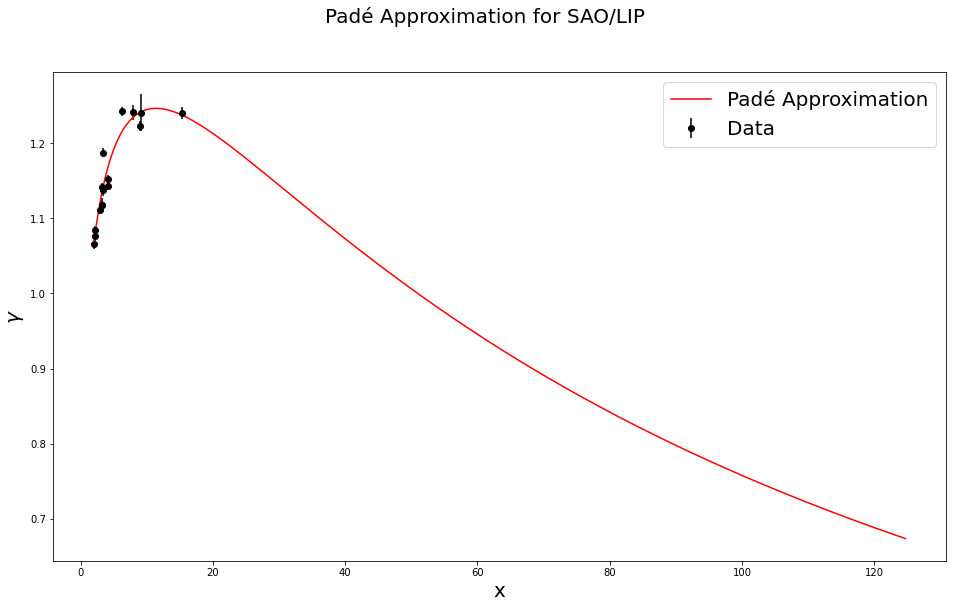

In [9]:
# # =============================================================================
# #   PLOT OF FITTED RESULT
# # =============================================================================
    
fig1, axes = subplots(nrows=1, ncols=1, sharex='all', sharey='all', figsize=(16,9))
suptitle('Padé Approximation for SAO/LIP', fontsize=20)
axes.errorbar(x_dat_values, y_dat_values, color = 'k', linestyle = '', marker = 'o', yerr = dat_uncertainties, ecolor = 'k', label='Data')
axes.plot(func_x, fitted_vals, 'r', linestyle = '-', label = 'Padé Approximation')
axes.legend(loc='best', fontsize=20)
axes.set_xlabel('x', fontsize=20)
axes.set_ylabel('$\gamma$', fontsize=20)
#axes.set_ylim(1.05,1.3)
#axes.set_xlim(0.0,20.0)
show()

- If the x, y or uncertainty values change in the data file, then the fitted model will also change, as well as the fitted Padé coefficients.

- Try changing the uncertainties first and compare against your initial plot, do you see a difference in the fitting? 

- As the error increases on a data point, the model does not fit to that point as strongly as others with lower error.

- If you would use a model like the Padé approximation in a publication, you would provide a table with the fitted coefficents so that others can reproduce your work. 

- Rather than fitting the model to data, try using just the fitted coefficients and the equation to generate the model (red line above).

<font color=lime><h1><center>Polynomial</center>

In [17]:
# # =============================================================================
# #   EXAMPLE FUNCTIONAL FORM
# # =============================================================================
# List of the cefficeint names
coeffs = ('a0','a1','a2','a3','a4','a5','a6','a7','a8','a9')

# This is the function that will be used to fit the values
def func_to_fit(x,k,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9):
    poly_approx = a0 + (a1*x) + (a2*k) + (a3*x*x) + (a4*k*k) + (a5*x*k) + (a6*x*x*x) + (a7*k*k*k) + (a8*x*x*k)  + (a9*x*k*k) 
    return poly_approx   

In [ ]:
# Here we are starting with initial guess fitting parameters
gprms   = [( 1.0, 0.1, 2.0, -3.0, 3.0, -0.3, 2.0, -2.0, 0.5, 0.5)]

In [18]:
# Get the number of parameters in the fitting functions
parvalslen = len(gprms[0])

In [19]:
# The two-dimensional domain of the fit.
xmin, xmax, nx = 0, 10, 101
ymin, ymax, ny = 0, 10, 101
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

In [20]:
# # Increase this for more scattering
noise_sigma = 100.0

# # The function to be fit is Z.
Z = np.zeros(X.shape)

In [21]:
# adding noise to the data
for p in gprms:
    Z += func_to_fit(X, Y, *p)
Z += noise_sigma * np.random.randn(*Z.shape)

In [22]:
# This is the callable that is passed to curve_fit. M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def final_func_to_fit(M, *args):
    x, y = M
    arr = np.zeros(x.shape)
    for i in range(len(args)//parvalslen):
        arr += func_to_fit(x, y, *args[i*parvalslen:i*parvalslen+parvalslen],  )
    return arr

In [23]:
# Initial guesses to the fit parameters.
guess_prms = [(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)]

In [24]:
# Flatten the initial guess parameter list.
p0 = [p for prms in guess_prms for p in prms]
print(p0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [25]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((X.ravel(), Y.ravel()))

In [26]:
# Do the fit, using our custom polynomial function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = scipy.optimize.curve_fit(final_func_to_fit, xdata, Z.ravel(), p0 )
fit = np.zeros(Z.shape)

In [27]:
for i in range(len(popt)//parvalslen):
    fit += func_to_fit(X, Y, *popt[i*parvalslen:i*parvalslen+parvalslen])
print('Fitted parameters:',popt)

Fitted parameters: [ 0.24507     3.91463278  1.10322953 -3.9359889   3.11752386 -0.14158823
  2.05581232 -2.00741803  0.48960007  0.50007282]


In [28]:
fitcoeffs = ''
for ipn in range(0, len(coeffs)):
    if ipn < len(coeffs)-1 :
        fitcoeffs += ( coeffs[ipn] + ' = ' + '{:6.3f}'.format(popt[ipn]) + ',   ' )
    else:
        fitcoeffs += ( coeffs[ipn] + ' = ' + '{:6.3f}'.format(popt[ipn])  )

In [29]:
print(fitcoeffs)

a0 =  0.245,   a1 =  3.915,   a2 =  1.103,   a3 = -3.936,   a4 =  3.118,   a5 = -0.142,   a6 =  2.056,   a7 = -2.007,   a8 =  0.490,   a9 =  0.500


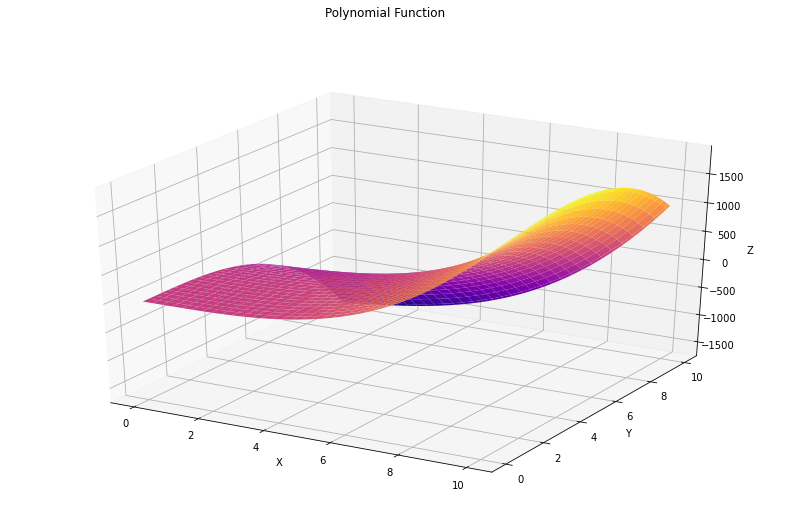

In [30]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(14,8))
fig.suptitle( 'Polynomial Function' )
ax = fig.gca(projection='3d')

# # Plots as a surface
ax.plot_surface(X, Y, fit, cmap='plasma')

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
#fig.savefig('test_input.png', bbox_inches='tight')
plt.show()

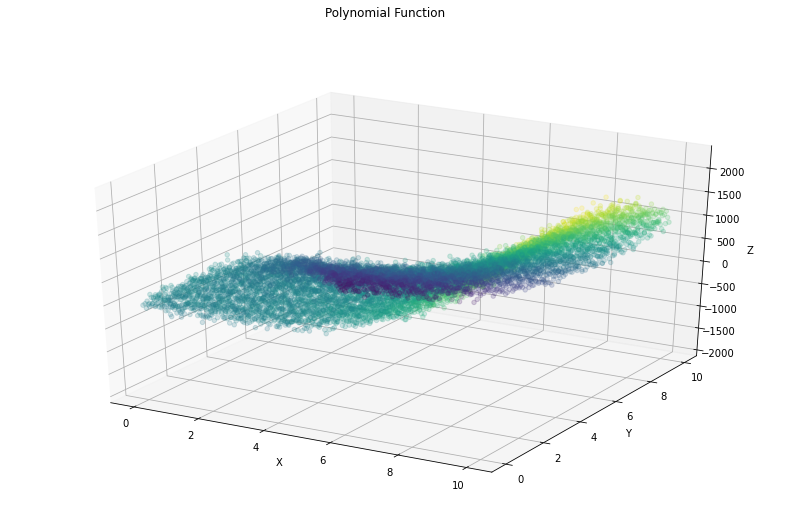

In [31]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(14,8))
fig.suptitle( 'Polynomial Function' )
ax = fig.gca(projection='3d')

# # Plots as a surface
ax.scatter(X, Y, Z, c=Z, alpha = 0.2)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
#fig.savefig('test_input.png', bbox_inches='tight')
plt.show()

- increase noise causes more noise in the data
- what happens if you change the polynomial equation to only go up to cubic?
- what happens if you change the initial guess parameters?

<font color=yellow><h1><center>Gaussian</center>

- FIT METHOD ADAPTED FROM C. HILL's 3D FIT EXAMPLE
- https://scipython.com/blog/non-linear-least-squares-fitting-of-a-two-dimensional-data/
- Christian Hill is our colleague and has a book and a blog on Python code

In [35]:
# Read in the saved data
input_points = np.loadtxt('Gaussian.dat')

In [36]:
# Set up the 2D domain of the input data 
xmin, xmax, nx = 0, input_points.shape[1], len(input_points[0,:])
ymin, ymax, ny = 0, input_points.shape[0], len(input_points[:,0])
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

In [37]:
# Gauss Function to be used in the fitting  
def gauss_func(x, y, x0, y0, xalpha, yalpha, A):
    some_gaussian = A * np.exp( -((x-x0)/xalpha)**2 -((y-y0)/yalpha)**2)
    return some_gaussian

In [38]:
# Parameter names
parnames   = [ 'x0', 'y0', 'xalpha', 'yalpha', 'A',  ] 
# Inital guess parameters
guess_prms = [(1.0, 1.0, 1.0, 1.0, 1.0)]
# Get the number of parameters in the fitting functions
parvalslen = len(parnames)

In [39]:
# This is the callable that is passed to curve_fit. M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def _gauss_func(M, *args):
    x, y = M
    arr = np.zeros(x.shape)
    for i in range(len(args)//parvalslen):
        arr += gauss_func(x, y, *args[i*parvalslen:i*parvalslen+parvalslen],  )
    return arr

In [40]:
# Flatten the initial guess parameter list.
p0 = [p for prms in guess_prms for p in prms]
print(p0)

[1.0, 1.0, 1.0, 1.0, 1.0]


In [41]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((X.ravel(), Y.ravel()))

In [42]:
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(_gauss_func, xdata, input_points.ravel(), p0 )

fit = np.zeros(input_points.shape)
for i in range(len(popt)//parvalslen):
    fit += gauss_func(X, Y, *popt[i*parvalslen:i*parvalslen+parvalslen])

In [43]:
# Print fitted function
print('Fitted parameters:')
print(popt)
coeffs = 'Fitted parameters: '
for ipn in range(0, len(parnames)):
    if ipn < len(parnames)-1 :
        coeffs += ( parnames[ipn] + ' = ' + '{:6.3f}'.format(popt[ipn]) + ',   ' )
    else:
        coeffs += ( parnames[ipn] + ' = ' + '{:6.3f}'.format(popt[ipn])  )

Fitted parameters:
[ 4.41399523 12.59692654  2.19391157  5.18782336 10.01742843]


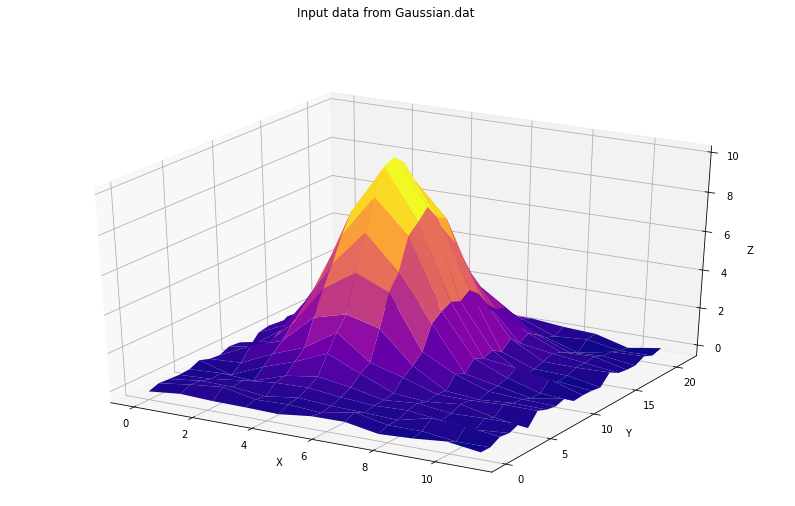

In [44]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(14,8))
fig.suptitle( 'Input data from Gaussian.dat' )
ax = fig.gca(projection='3d')

# # Plots as a surface
ax.plot_surface(X, Y, input_points, cmap='plasma')

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
#fig.savefig('test_input.png', bbox_inches='tight')
plt.show()

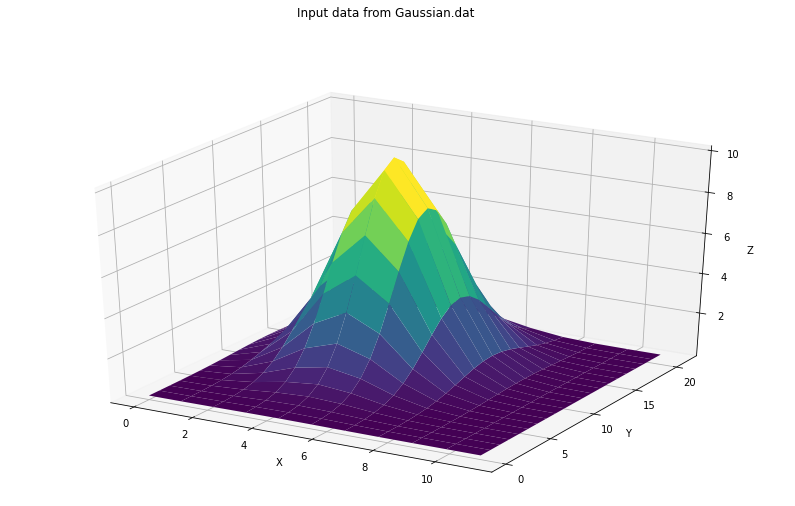

In [45]:
# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(14,8))
fig.suptitle( 'Input data from Gaussian.dat' )
ax = fig.gca(projection='3d')

# # Plots as a surface
ax.plot_surface(X, Y, fit, cmap='viridis')

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
#fig.savefig('test_input.png', bbox_inches='tight')
plt.show()

In [ ]:
# all done!